##Multivariate Linear Regression Model From Srcatch

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn.datasets import fetch_california_housing

In [86]:
data = fetch_california_housing()

In [87]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [88]:
data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [89]:
data['data'].shape

(20640, 8)

In [90]:
df = pd.DataFrame(data['data'])

In [91]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [92]:
df.columns = data['feature_names']

In [93]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [94]:
data['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [95]:
# Normalize input matrix so that data lies in the range of +1 to -1

X = (df - df.mean()) / (df.max() - df.min())

In [96]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,5.508083e-18,5.508083e-18,1.290957e-18,-1.420053e-18,-3.442552e-19,5.378988e-21,-2.368476e-16,-1.707506e-15
std,1.310204e-01,2.467756e-01,1.753950e-02,1.404874e-02,3.174030e-02,8.358045e-03,2.269875e-01,1.995550e-01
min,-2.324638e-01,-5.419507e-01,-3.248795e-02,-2.262871e-02,-3.986874e-02,-1.913946e-03,-3.285719e-01,-4.761251e-01
25%,-9.015538e-02,-2.086174e-01,-7.005976e-03,-2.685655e-03,-1.789503e-02,-5.157676e-04,-1.808567e-01,-2.221410e-01
50%,-2.316320e-02,7.068893e-03,-1.416892e-03,-1.419802e-03,-7.272534e-03,-2.032280e-04,-1.457876e-01,1.075403e-01
75%,6.017703e-02,1.639316e-01,4.419171e-03,8.451334e-05,8.394945e-03,1.702871e-04,2.208436e-01,1.553490e-01
max,7.675362e-01,4.580493e-01,9.675120e-01,9.773713e-01,9.601313e-01,9.980861e-01,6.714281e-01,5.238749e-01


In [97]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.307205,0.242363,0.011024,-0.002160,-0.030928,-0.000415,0.238910,-0.264970
1,0.305563,-0.149794,0.005736,-0.003699,0.027342,-0.000773,0.236784,-0.263974
2,0.233564,0.458049,0.020269,-0.000689,-0.026051,-0.000216,0.235721,-0.265966
3,0.122235,0.458049,0.002753,-0.000700,-0.024313,-0.000421,0.235721,-0.266962
4,-0.001688,0.458049,0.006046,-0.000462,-0.024117,-0.000716,0.235721,-0.266962


In [98]:
y = data['target']

In [99]:
y.shape

(20640,)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [102]:
print(f'{X_train.shape=}')
X_train = X_train.T
print(f'{X_train.shape=}')

X_train.shape=(16512, 8)
X_train.shape=(8, 16512)


In [103]:
print(f'{y_train.shape=}')
y_train = np.array([y_train])
print(f'{y_train.shape=}')

y_train.shape=(16512,)
y_train.shape=(1, 16512)


In [104]:
print(f'{X_test.shape=}')
X_test = X_test.T
print(f'{X_test.shape=}')

X_test.shape=(4128, 8)
X_test.shape=(8, 4128)


In [105]:
print(f'{y_test.shape=}')
y_test = np.array([y_test])
print(f'{y_test.shape=}')

y_test.shape=(4128,)
y_test.shape=(1, 4128)


## Helper Functions

In [106]:
# n -> number of features, m -> number of samples
def initilize_parameters(n):
  w = np.random.rand(1, n)
  b = 0

  return w, b

In [107]:
def forward(X, w, b): # w --> 1 x n, X --> m x n

  z = np.dot(w, X) + b

  return z

In [108]:
def cost_function(z, y):
  m = y.shape[1]
  J = (1 / (2 * m) * np.sum(np.square(z - y)))

  return J

In [109]:
def back_prop(X, y, z):
  m = y.shape[1]

  dz = (1 / m) * (z - y)

  dw = np.dot(dz, X.T)

  db = np.sum(dz)

  return dw, db

In [110]:
def gradient_descent_update(w, b, dw, db, lr):

  w -=  lr * dw
  b -= lr * db

  return w, b

## Linear Regression Model

In [111]:
def linear_regression_model(X_train, y_train, X_test, y_test, lr, epochs):

  n = X_train.shape[0]
  w, b = initilize_parameters(n)

  costs_train = []
  m_train = y_train.shape[1]
  m_test = y_test.shape[1]

  # Training
  for i in range(epochs):

    y_pre = forward(X_train, w, b)
    cost_train = cost_function(y_pre, y_train)

    dw, db = back_prop(X_train, y_train, y_pre)
    w, b = gradient_descent_update(w, b, dw, db, lr)

    # store training cost in a list for plotting purpose
    if i % 10 == 0:
      costs_train.append(cost_train)


    # Testing
    # cost_test
    y_pre_test = forward(X_test, w, b)
    cost_test = cost_function(y_pre_test, y_test)


    # print cost_train, cost_val, MAE_train, MAE_val
    print(f'Epochs {i + 1} / {epochs}: ')
    print(f'Training cost {cost_train} | Testing cost {cost_test}')

  plt.plot(costs_train)
  plt.xlabel('Iterations(per tens)')
  plt.ylabel('Training cost')
  plt.title('Learning rate ' + str(lr))
  plt.show()


Epochs 1 / 500: 
Training cost 2.7715085116085323 | Testing cost 1.4522879551203007
Epochs 2 / 500: 
Training cost 1.4019222203047155 | Testing cost 0.9445538602407388
Epochs 3 / 500: 
Training cost 0.9051958683240868 | Testing cost 0.7554392450879684
Epochs 4 / 500: 
Training cost 0.7228122388346077 | Testing cost 0.6821517667620312
Epochs 5 / 500: 
Training cost 0.6536996566219613 | Testing cost 0.6512731657848245
Epochs 6 / 500: 
Training cost 0.6254668530938668 | Testing cost 0.6361245142251689
Epochs 7 / 500: 
Training cost 0.6120477376394104 | Testing cost 0.626951378476265
Epochs 8 / 500: 
Training cost 0.6040535788937322 | Testing cost 0.6201509094152846
Epochs 9 / 500: 
Training cost 0.5980997983542604 | Testing cost 0.6143699889551388
Epochs 10 / 500: 
Training cost 0.5929636055741965 | Testing cost 0.6090864774497469
Epochs 11 / 500: 
Training cost 0.5882007304686071 | Testing cost 0.6040900554384735
Epochs 12 / 500: 
Training cost 0.5836474293457083 | Testing cost 0.5992903

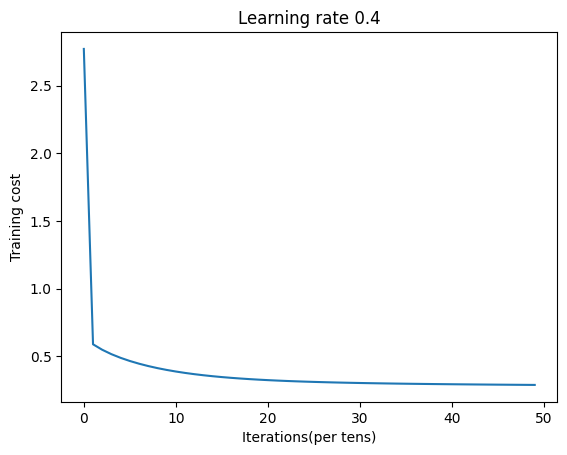

In [112]:
linear_regression_model(X_train, y_train, X_test, y_test, 0.4, 500)